Restarted Python 3.12.4

Connected to Python 3.12.4

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import math

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.svm import SVC

In [10]:
from sklearn import preprocessing

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
import requests

In [14]:
from sklearn.metrics import classification_report as cfr

In [15]:
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y,y_predict)
    ax=plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_ylabel=('True labels')
    ax.set_xlabel=('Predicted labels')
    ax.set_title=('Confusion_matrix')
    ax.xaxis.set_ticklabels('Did not land', 'landed'); ax.yaxis('did not land','landed')
    plt.show()

In [16]:
url=  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

In [17]:
spacexl=pd.read_csv(r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')

In [18]:
spacexl

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [19]:
url2='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

In [20]:
spacexll=pd.read_csv(r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [21]:
spacexll

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [22]:
y=spacexl['Class'].to_numpy()

In [23]:
x=spacexll

In [24]:
scl= preprocessing.StandardScaler()

In [25]:
x=scl.fit_transform(x)

In [26]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=0, test_size=0.2)

In [28]:
x.shape

(90, 83)

In [29]:
y.shape

(90,)

In [30]:
x_test.shape

(18, 83)

In [31]:
y_test.shape

(18,)

In [32]:
Parameter={'C':[0.01,0.1,1],
           'penalty':['l2'],
           'solver':['lbfgs']}

In [33]:
lr=LogisticRegression()

In [34]:
logreg_cv=GridSearchCV(lr,Parameter, cv=10)

In [35]:
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [36]:
print('Best hypermeter found', logreg_cv.best_params_)

Best hypermeter found {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [37]:
print('accuracy',logreg_cv.best_score_)

accuracy 0.85


In [38]:
yhat=logreg_cv.predict(x_test)

In [39]:
cfr(y_test,yhat)

'              precision    recall  f1-score   support\n\n           0       0.80      0.67      0.73         6\n           1       0.85      0.92      0.88        12\n\n    accuracy                           0.83        18\n   macro avg       0.82      0.79      0.80        18\nweighted avg       0.83      0.83      0.83        18\n'

TypeError: Axis.set_ticklabels() takes 2 positional arguments but 3 were given

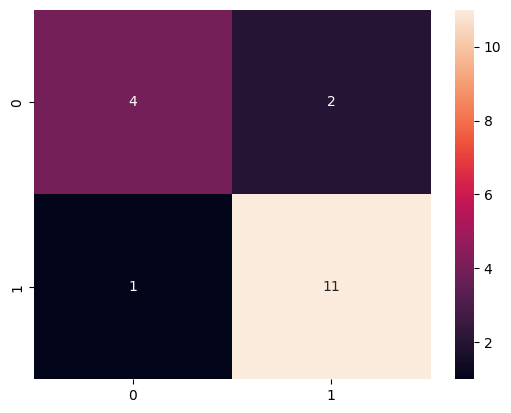

In [40]:
plot_confusion_matrix(y_test,yhat)

In [41]:
sv=SVC()

In [42]:
parameter={'kernel':('rbf','poly','sigmoid','linear'),
           'C':np.logspace(-3,3,5),
           'gamma':np.logspace(-3,3,5)}

In [43]:
svc_cv=GridSearchCV(sv,parameter, cv=10)

In [44]:
svc_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('rbf', 'poly', 'sigmoid', 'linear')})

In [45]:
print('best hypermeter',svc_cv.best_params_)

best hypermeter {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}


In [46]:
print('accuracy score', svc_cv.best_score_)

accuracy score 0.85


In [47]:
ypred=svc_cv.predict(x_test)

In [48]:
cfr(y_test,ypred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.67      0.73         6\n           1       0.85      0.92      0.88        12\n\n    accuracy                           0.83        18\n   macro avg       0.82      0.79      0.80        18\nweighted avg       0.83      0.83      0.83        18\n'

TypeError: Axis.set_ticklabels() takes 2 positional arguments but 3 were given

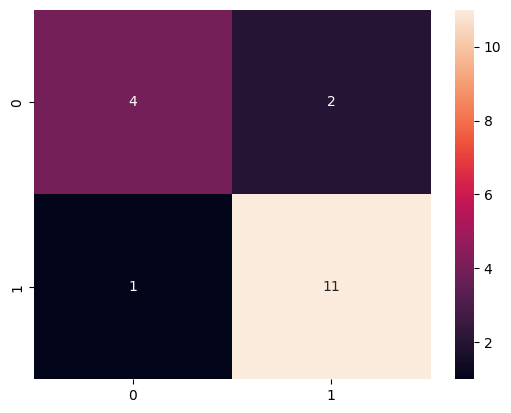

In [49]:
plot_confusion_matrix(y_test,ypred)

In [50]:
drc=DecisionTreeClassifier()

In [52]:
parameters={'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_depth':[2*n for n in range(1,10)],
            'max_features':['auto','sqrt'],
            'min_samples_leaf':[1,2,4],
            'min_samples_split':[2,5,10]}

In [53]:
drc_cv=GridSearchCV(drc,parameters,cv=10)

In [54]:
drc_cv.fit(x_train,y_train)

C:\Users\allwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\allwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\allwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [55]:
print('Best hypermeters', drc_cv.best_params_)

Best hypermeters {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


In [56]:
print('Accuracy',drc_cv.best_score_)

Accuracy 0.9035714285714287


In [57]:
ypreds=drc_cv.predict(x_test)

In [58]:
cfr(y_test,ypreds)

'              precision    recall  f1-score   support\n\n           0       1.00      0.67      0.80         6\n           1       0.86      1.00      0.92        12\n\n    accuracy                           0.89        18\n   macro avg       0.93      0.83      0.86        18\nweighted avg       0.90      0.89      0.88        18\n'

TypeError: Axis.set_ticklabels() takes 2 positional arguments but 3 were given

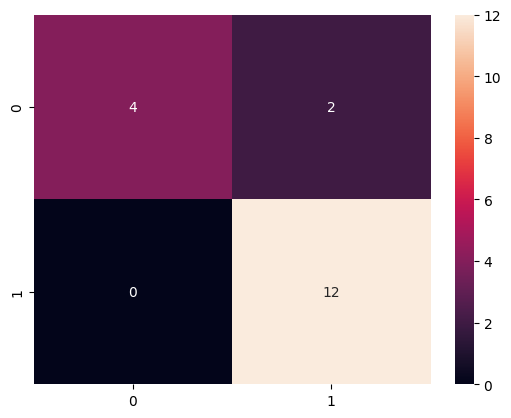

In [59]:
plot_confusion_matrix(y_test,ypreds)

In [60]:
knn=KNeighborsClassifier()

In [61]:
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'p':[1,2]}

In [62]:
knn_cv=GridSearchCV(knn,param_grid,cv=10)

In [63]:
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [64]:
print('Best main hypermeters', knn_cv.best_params_)

Best main hypermeters {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}


In [65]:
print('Accuracy 1',knn_cv.best_score_)

Accuracy 1 0.8642857142857142


In [66]:
y_preds=knn_cv.predict(x_test)

In [67]:
cfr(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.75      0.50      0.60         6\n           1       0.79      0.92      0.85        12\n\n    accuracy                           0.78        18\n   macro avg       0.77      0.71      0.72        18\nweighted avg       0.77      0.78      0.76        18\n'

TypeError: Axis.set_ticklabels() takes 2 positional arguments but 3 were given

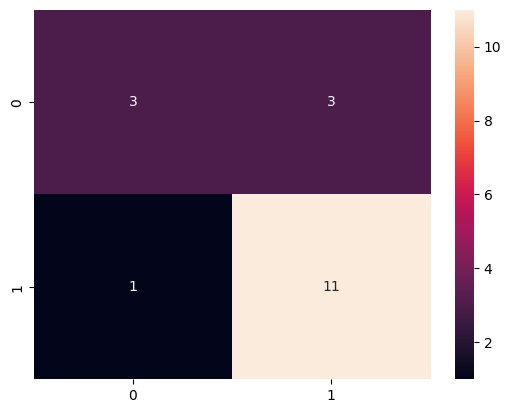

In [68]:
plot_confusion_matrix(y_test,y_preds)

In [69]:
Total_accuracy=({'logistic_reg':.8,'support vector':.8,'Decision Tree':1,'knearest n':.75})

In [70]:
import matplotlib.pyplot as plt

In [71]:
models = list(Total_accuracy.keys())

In [72]:
accuracies = list(Total_accuracy.values())

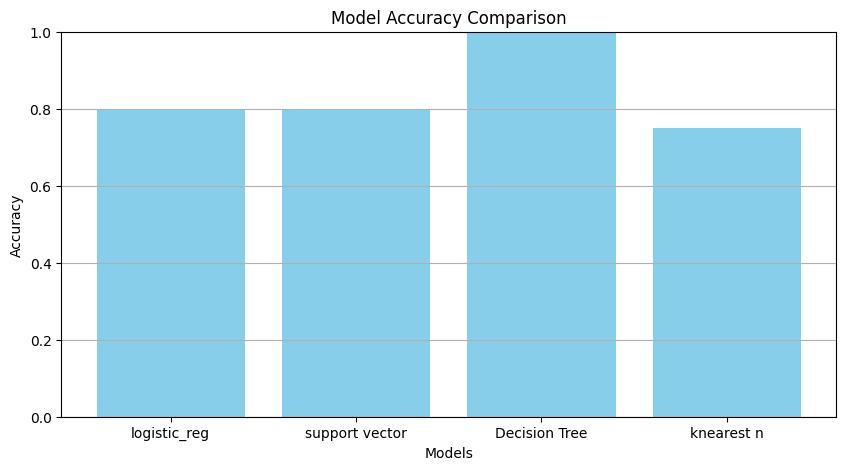

In [73]:
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.grid(axis='y')
plt.show()